# Lab #2 (Plotting)
### By Stakhov K.V. [8.1212]

### 1. Make a program that plots the function `g(y) = e^y * sin(4*y)` for `y = 0..4` using a red solid line. Use 500 intervals for evaluating points in [0; 4]. Store all coordinates and values in arrays. Set labels on the axis and use a title “Damped sine wave”.

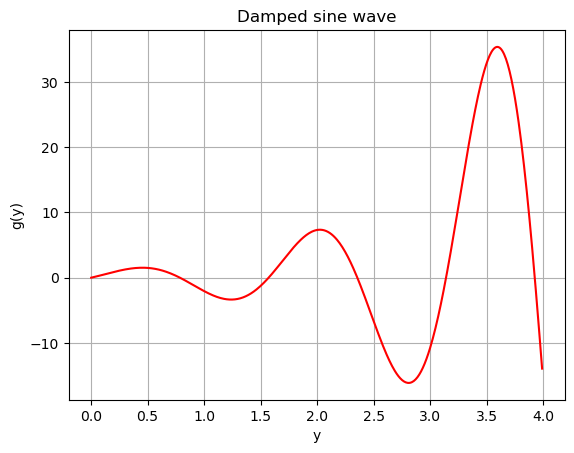

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

a = 0.0
b = 4.0
n = 500

y = np.arange(a, b, (b - a) / n) # Point array
g = lambda y: math.exp(y) * math.sin(4 * y) # g(y) function
g_y = np.array([g(yi) for yi in y]) # Function values array

fig, ax = plt.subplots()
ax.plot(y, g_y, color = "red", label = "g(y)")
ax.set(xlabel = 'y', ylabel = "g(y)", title = "Damped sine wave")
ax.grid()
fig.show()

### 2. As the Task 1, but add a black dashed curve for the function `h(y) = e^(-3/2 * y) * sin(4 * y)`. Include a legend for each curve (with names g and h).

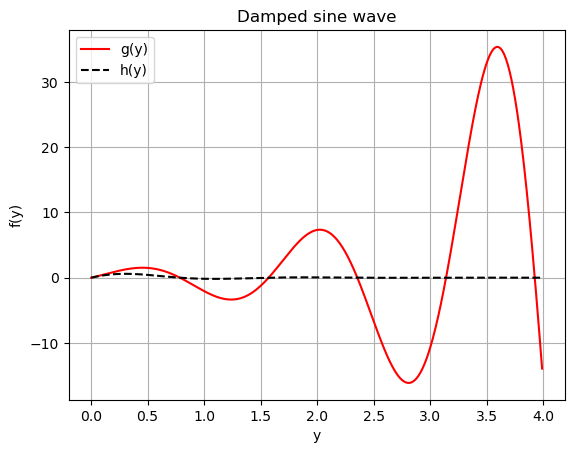

In [2]:
h = lambda y: math.exp((-3/2) * y) * math.sin(4 * y)
h_y = np.array([h(yi) for yi in y])

fig, ax = plt.subplots()
ax.plot(y, g_y, color = "red", label = "g(y)")
ax.plot(y, h_y, linestyle = "dashed", color = "black", label = "h(y)")
ax.set(xlabel = 'y', ylabel = "f(y)", title = "Damped sine wave")
ax.grid()
ax.legend()
fig.show()

### 3. Make a program that plots the function `z(x, y) = cos(x + y) * sin(x * y)` for `x = -2..2`, `y = -2..2`. Use 500 intervals for evaluating points in the intervals.

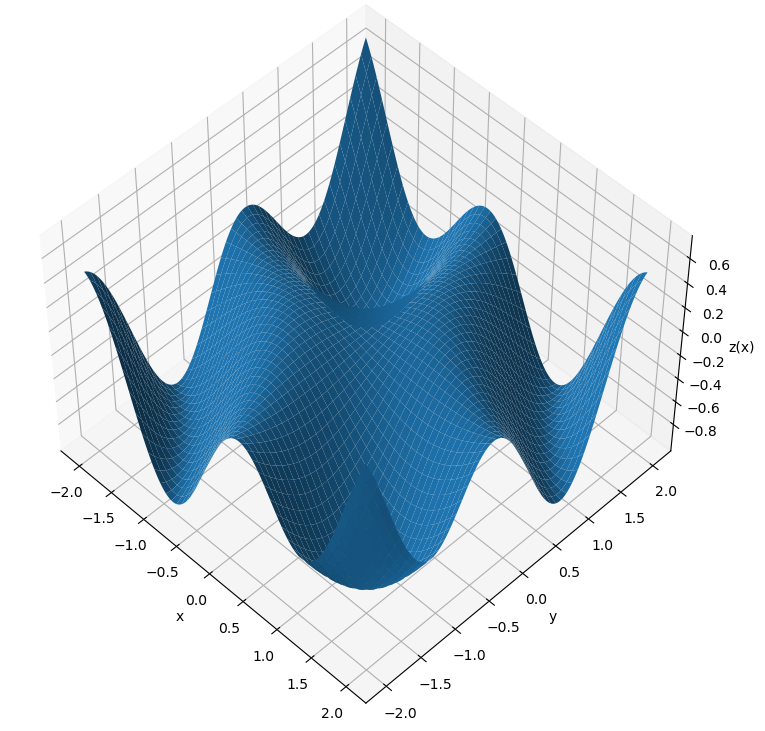

In [3]:
a = -2
b = 2
n = 500

# Point arrays
x = np.arange(a, b, (b - a) / n)
y = x.copy()

# z(x, y) function and a 2d array of its values for each (x_i, y_i)
z = lambda x, y: math.cos(x + y) * math.sin(x * y)
z_xy = np.array([[z(xi, yi) for xi in x] for yi in y])

x, y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize = (9, 9), subplot_kw = dict(projection = "3d"))
ax.plot_surface(x, y, z_xy)
ax.view_init(50, -45)
ax.set(xlabel = 'x', ylabel = "y", zlabel = "z(x)")
plt.show()

### 4. Make a program that plots the zero level isosurface of the function `F(x, y, z) = con(con(con(con(con(1 − x^2, 1 − y^2), 1 − z^2), x^2 + y^2 − 0.25), x^2 + z^2 − 0.16), y^2 + z^2 − 0.09)`, where `con(a, b) = a + b − sqrt(a^2 + b^2)`.

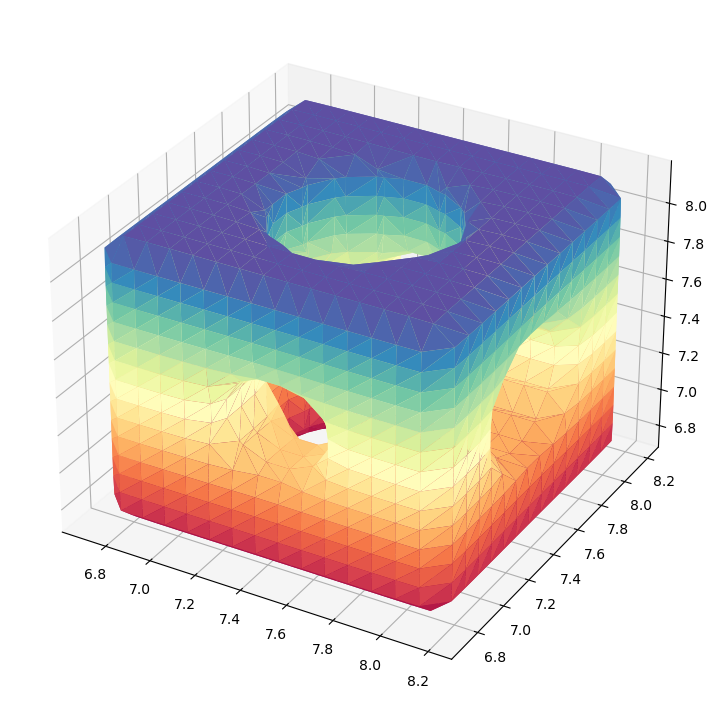

In [4]:
from skimage.measure import marching_cubes

con = lambda a, b: a + b - np.sqrt(a**2 + b**2)
F = lambda x, y, z: con(con(con(con(con(1 - x**2, 1 - y**2), 1 - z**2), x**2 + y**2 - 0.25), x**2 + z**2 - 0.16), y**2 + z**2 - 0.09)

# Coordinate grid definition
a = -10
b = 10
n = 150

# Coordinate grid with specified definition
x, y, z = np.meshgrid(np.linspace(a, b, n), np.linspace(a, b, n), np.linspace(a, b, n))
vol = F(x, y, z) # Function values in every point on the grid
iso = 0.0 # Iso-level for the surface
# Use marching cubes algorithm to build the isosurface.
# As a result we get an array of vertex coordinates and
# an array of all faces made up by the vertices.
verts, faces, _, _ = marching_cubes(vol, iso, spacing = (0.1, 0.1, 0.1))

fig, ax = plt.subplots(figsize = (9, 9), subplot_kw = dict(projection = "3d"))
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], cmap = "Spectral", lw = 1)
plt.show()